WEEKLY QUIZ WEEK 8위클리퀴즈 8주차입니다.

좌측상단에 파일->Drive에 사본저장->구글 드라이브에 있는 사본으로 문제푸신후 실행 제출부탁드립니다.

제출시 상단의 노트제목은 "week8_이름"으로 변경하시고 우측상단에 공유 눌러서 링크복사 후에 링크올리시면됩니다.
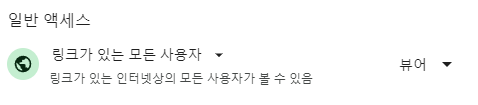

#보스턴 주택가격 예측(캐글 데이터)
##링크 : https://drive.google.com/drive/folders/1nMLp7hahzMLlJpn3d-BA7EBQXe78si-t?usp=drive_link



#### 1. 데이터 불러오기
    1) pandas 라이브러리를 이용하여 train, test csv를 불러오기
    2) train 데이터 정보 확인(info함수) => 칼럼의 이름과 칼럼별 자료형 확인 필요 (int64, float, object 인지 확인 할 것)
    3) train data 상위 5개를 뽑아내기 => 데이터가 어떻게 구성되어있는지 확인(무슨 칼럼에 무슨값들이 들어가져있는지 확인)
    1번부터 차례대로 코드로 구현 할것

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


In [ ]:
train ,test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
display(train.head())
display(test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


2. 데이터 분석

        matplotlib 라이브러리 or seaborn 라이브러리를 이용하여 타겟 변수(집값 칼럼) 분포 확인 => 타겟값에대 한 분석 필요성 이유

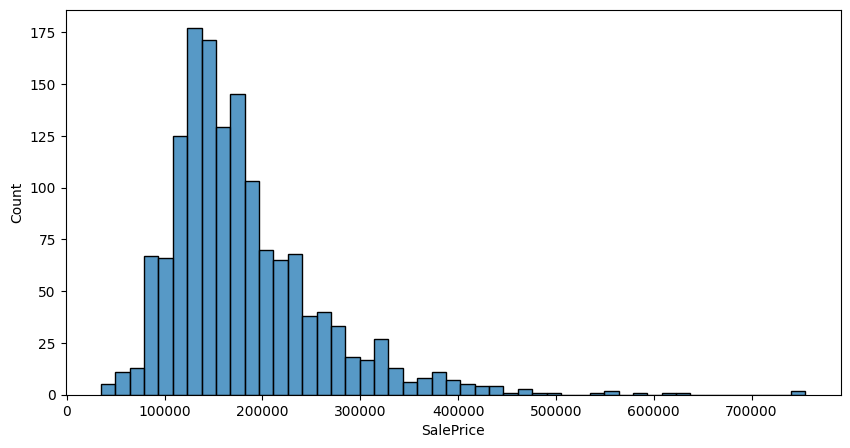

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(train["SalePrice"]);

In [ ]:
# 이유 : 정보의 비대치성과, 이상치 등을 확인하여 처리하기 위해

3. 독립변수와 종속변수간의 상관관계 분석하기
        상관관계가 0.3 이상인경우만 matplot 라이브러리 or seaborn 라이브러리를 이용하여 heatmap을 그릴것
        => 상관관계가 적은 칼럼의 제거를 위한 분석

In [ ]:
to_heat_ = train[train.dtypes[train.dtypes != "object"].index].corr()
thrshold = 0.3

In [ ]:
cols_corr = []

for col in to_heat_[-1:]:
    if to_heat_[-1:][col].values > thrshold:
        cols_corr.append(col)

In [ ]:
cols_corr

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

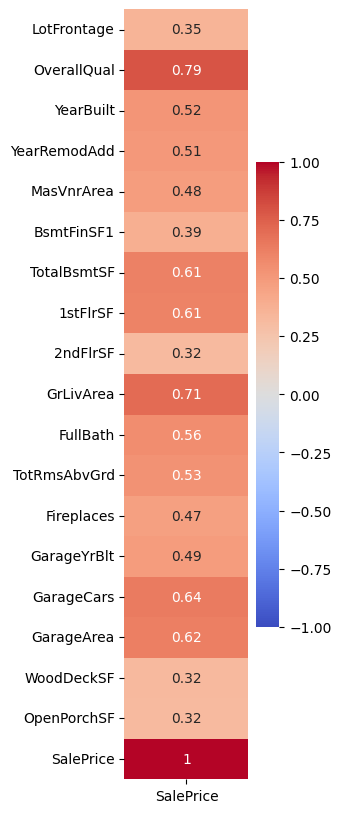

In [ ]:
fig, ax = plt.subplots(figsize=(2, 10))
sns.heatmap(train[cols_corr].corr()[-1:].T,
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            annot=True);

####4. 결측값 확인
    1) Null값 비율이 50%이상인 칼럼을 찾고, 해당 칼럼을 제거
    2) 칼럼을 제거후 나머지 칼럼의 결측치는 mean값으로 대체

In [ ]:
cols_drop = []
for col in train.keys():
    if train[col].isna().sum()/len(train) > 0.5:
        cols_drop.append(col)

cols_drop

train = train.drop(columns=cols_drop)
test = test.drop(columns=cols_drop)

In [ ]:
cols_corr = cols_corr[:-1]

In [ ]:
cols_corr

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [ ]:
train_droped_num = train[cols_corr].select_dtypes(["number"]).fillna(train[cols_corr].select_dtypes(["number"]).mean())
test_droped_num = test[cols_corr].select_dtypes(["number"]).fillna(train[cols_corr].select_dtypes(["number"]).mean())

####5. 데이터 인코딩 => 예를들어[남, 여] 같은 문자형 데이터는 쓸수 없기에 수치화 하여야함.
    1) 카테고리형 데이터를 One hot encoding 한다.
    2) One hot encoding한 데이터와 기존 수치형 데이터를 merge 시킨다. => merge 시킨데이터가 최종 train data가 됩니다.

In [ ]:
train_col_drop_obj = test.select_dtypes("object")
test_col_drop_obj = train.select_dtypes("object")

In [ ]:
# 최빈값으로 결측치 채우기
train_col_drop_obj = train_col_drop_obj.fillna(train_col_drop_obj.mode().iloc[0])
test_col_drop_obj = test_col_drop_obj.fillna(train_col_drop_obj.mode().iloc[0])

diff_cat = []
for col in train_col_drop_obj.columns:
    if(set(train_col_drop_obj[col].unique()) != set(test_col_drop_obj[col].unique())):
        diff_cat.append(col)

# 각 칼럼별 카테고리가 맞지 않으면 컬럼 삭제
train_col_drop_obj.drop(columns=diff_cat, inplace=True)
test_col_drop_obj.drop(columns=diff_cat, inplace=True)

In [ ]:
test_col_drop_obj

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,RoofStyle,...,CentralAir,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,Gable,...,Y,Gd,Typ,Gd,Attchd,RFn,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,Gable,...,Y,TA,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,Gable,...,Y,Gd,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,Gable,...,Y,Gd,Typ,Gd,Detchd,Unf,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,Gable,...,Y,Gd,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,Gable,...,Y,TA,Typ,TA,Attchd,RFn,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,Gable,...,Y,TA,Min1,TA,Attchd,Unf,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,Gable,...,Y,Gd,Typ,Gd,Attchd,RFn,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,Hip,...,Y,Gd,Typ,Gd,Attchd,Unf,TA,Y,WD,Normal


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

final_train_ohe = ohe.fit_transform(train_col_drop_obj)
final_test_ohe = ohe.transform(test_col_drop_obj)

In [ ]:
final_train_data = pd.concat([train_droped_num, pd.DataFrame(final_train_ohe.toarray())], axis = 1)
final_test_data = pd.concat([test_droped_num, pd.DataFrame(final_test_ohe.toarray())], axis = 1)

6. XGBoost regeression 모델 학습 및 Test Data 예측

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_train_data, train["SalePrice"], test_size=0.2)
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
mean_absolute_error(y_test, xgb.predict(X_test))

22518.445740582192

In [ ]:
# 최종 예측

xgb.predict(final_test_data)

array([119813.375, 162087.4  , 178738.72 , ..., 118931.625, 220872.42 ,
       408755.97 ], dtype=float32)